# 读取数据

In [2]:
import numpy as np
import pandas as pd

In [3]:
lenddata = pd.read_csv('lendingdata.csv')
lenddata.head()

,sex,degree,uni_level,u_loan,guarantee,amount,income,period_m,repayment_m,repayment_T,count,c_borrowing,c_repayment,c_overdue,c_fre,c_over_fre,c_overrate,c_over_frerate,performance
0,male,bachelor,other,travel,Y,0.109063,0.015546,0.505110,-0.238010,0.106394,-0.420401,0.556433,0.551220,-0.370189,0.246736,-0.370365,-0.461185,-0.426766,1
1,male,bachelor,other,study,Y,0.109063,0.624677,0.505110,-0.228049,0.146047,-0.542786,1.762922,1.964899,-0.370189,1.613174,-0.370365,-0.461185,-0.426766,1
2,male,bachelor,high,trading,N,-1.801620,-1.944738,0.505110,-0.818821,-2.216702,-0.787555,-0.879862,-0.774510,-0.370189,-0.677620,-0.370365,-0.461185,-0.426766,1
3,male,NaN,other,study,N,4.738273,2.795424,0.505110,0.910477,4.678341,-0.053247,-0.018085,0.023526,-0.370189,-0.436484,-0.370365,-0.461185,-0.426766,1
4,male,bachelor,other,living,N,1.266366,0.063777,-0.130501,0.210670,1.207284,-0.624375,0.412804,0.472341,-0.370189,0.005599,-0.370365,-0.461185,-0.426766,1


In [4]:
lenddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             1091 non-null   object 
 1   degree          1089 non-null   object 
 2   uni_level       1091 non-null   object 
 3   u_loan          1091 non-null   object 
 4   guarantee       1091 non-null   object 
 5   amount          1091 non-null   float64
 6   income          1091 non-null   float64
 7   period_m        1091 non-null   float64
 8   repayment_m     1091 non-null   float64
 9   repayment_T     1091 non-null   float64
 10  count           1091 non-null   float64
 11  c_borrowing     1091 non-null   float64
 12  c_repayment     1091 non-null   float64
 13  c_overdue       1091 non-null   float64
 14  c_fre           1091 non-null   float64
 15  c_over_fre      1091 non-null   float64
 16  c_overrate      1091 non-null   float64
 17  c_over_frerate  1091 non-null   f

# EDA和清洗

In [6]:
lenddata.performance.value_counts()

1    823
0    268
Name: performance, dtype: int64

In [9]:
# 缺失情况
lenddata.isnull().sum()

sex               0
degree            2
uni_level         0
u_loan            0
guarantee         0
amount            0
income            0
period_m          0
repayment_m       0
repayment_T       0
count             0
c_borrowing       0
c_repayment       0
c_overdue         0
c_fre             0
c_over_fre        0
c_overrate        0
c_over_frerate    0
performance       0
dtype: int64

In [14]:
# 填补众数
lenddata.degree.value_counts(dropna=False)

bachelor    758
college     295
master       21
doctor       15
NaN           2
Name: degree, dtype: int64

In [ ]:
# 第一种方式
lenddata.degree = lenddata.degree.fillna('bachelor') 

In [12]:
# 利用Counter计数
from collections import Counter

In [13]:
level  = Counter(lenddata.degree)   # 以字典形式进行存储
level

Counter({'bachelor': 758, nan: 2, 'master': 21, 'college ': 295, 'doctor': 15})

In [23]:
# most_common
top  = level.most_common(1)[0][0]
top

'bachelor'

In [24]:
# 第二种方式
lenddata.degree = lenddata.degree.fillna(top)

In [25]:
lenddata.isnull().sum()

sex               0
degree            0
uni_level         0
u_loan            0
guarantee         0
amount            0
income            0
period_m          0
repayment_m       0
repayment_T       0
count             0
c_borrowing       0
c_repayment       0
c_overdue         0
c_fre             0
c_over_fre        0
c_overrate        0
c_over_frerate    0
performance       0
dtype: int64

In [35]:
lenddata.describe([0.99]).T.round(4)  # 数据本身已做了z-score的标准化

,count,mean,std,min,50%,99%,max
amount,1091.0,-0.0000,1.0000,-2.0898,0.1091,4.7383,11.6821
income,1091.0,-0.0000,1.0000,-1.9447,0.2459,2.9874,8.8604
period_m,1091.0,0.0000,1.0000,-2.6729,0.5051,0.5051,0.5051
repayment_m,1091.0,0.0000,1.0000,-0.8188,-0.2280,2.5587,19.4130
repayment_T,1091.0,0.0000,1.0000,-2.2167,0.1395,4.5145,11.2066
count,1091.0,0.0000,1.0000,-0.7876,-0.2980,4.1119,9.2888
c_borrowing,1091.0,0.0000,1.0000,-0.8799,-0.3053,3.4152,10.9207
c_repayment,1091.0,0.0000,1.0000,-0.7745,-0.2443,3.2563,10.8995
c_overdue,1091.0,0.0000,1.0000,-0.3702,-0.3702,4.2596,6.5766
c_fre,1091.0,-0.0000,1.0000,-0.6776,-0.3159,4.3862,7.5210


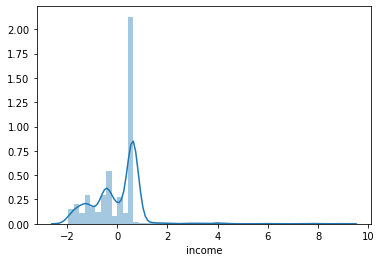

In [33]:
import seaborn as sns
sns.distplot(lenddata.income,kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1dc4be10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1dbd2690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1dc73050>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1dc73d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1dbe5610>],
 'means': []}

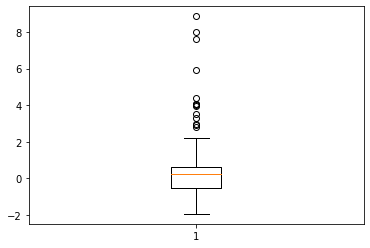

In [34]:
import matplotlib.pyplot as plt
plt.boxplot(lenddata.income)

# 使用woe库

In [36]:
# 导入
import woe.feature_process as fp # 在feature_process.py定义
import woe.eval as eval  # 输出woe分箱结果

在使用woe库之前需要做数据预处理：对数据特定要求，必须要包含名叫target变量，且变量取值0，1

In [37]:
# 修改标签名字
lenddata.rename(columns={'performance':'target'},inplace=True)
lenddata.columns

Index(['sex', 'degree', 'uni_level', 'u_loan', 'guarantee', 'amount', 'income',
       'period_m', 'repayment_m', 'repayment_T', 'count', 'c_borrowing',
       'c_repayment', 'c_overdue', 'c_fre', 'c_over_fre', 'c_overrate',
       'c_over_frerate', 'target'],
      dtype='object')

In [46]:
# 提取特征和标签
X = lenddata.iloc[:,:-1]
Y = lenddata.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=1234)
Xtrain.shape

(763, 18)

In [48]:
train = pd.concat([Xtrain,Ytrain],axis=1).reset_index(drop=True)
test = pd.concat([Xtest,Ytest],axis=1).reset_index(drop=True)

## 相关性探索一下：共线（散点图）

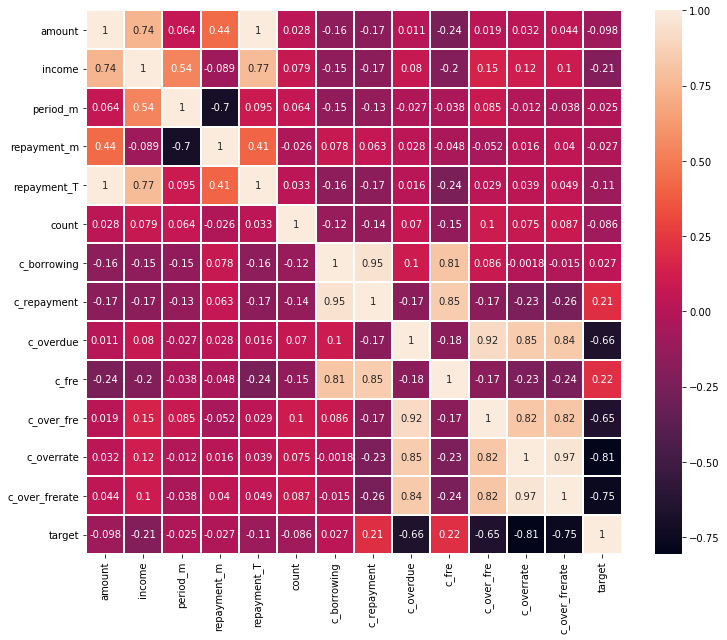

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=True,linewidths=1)

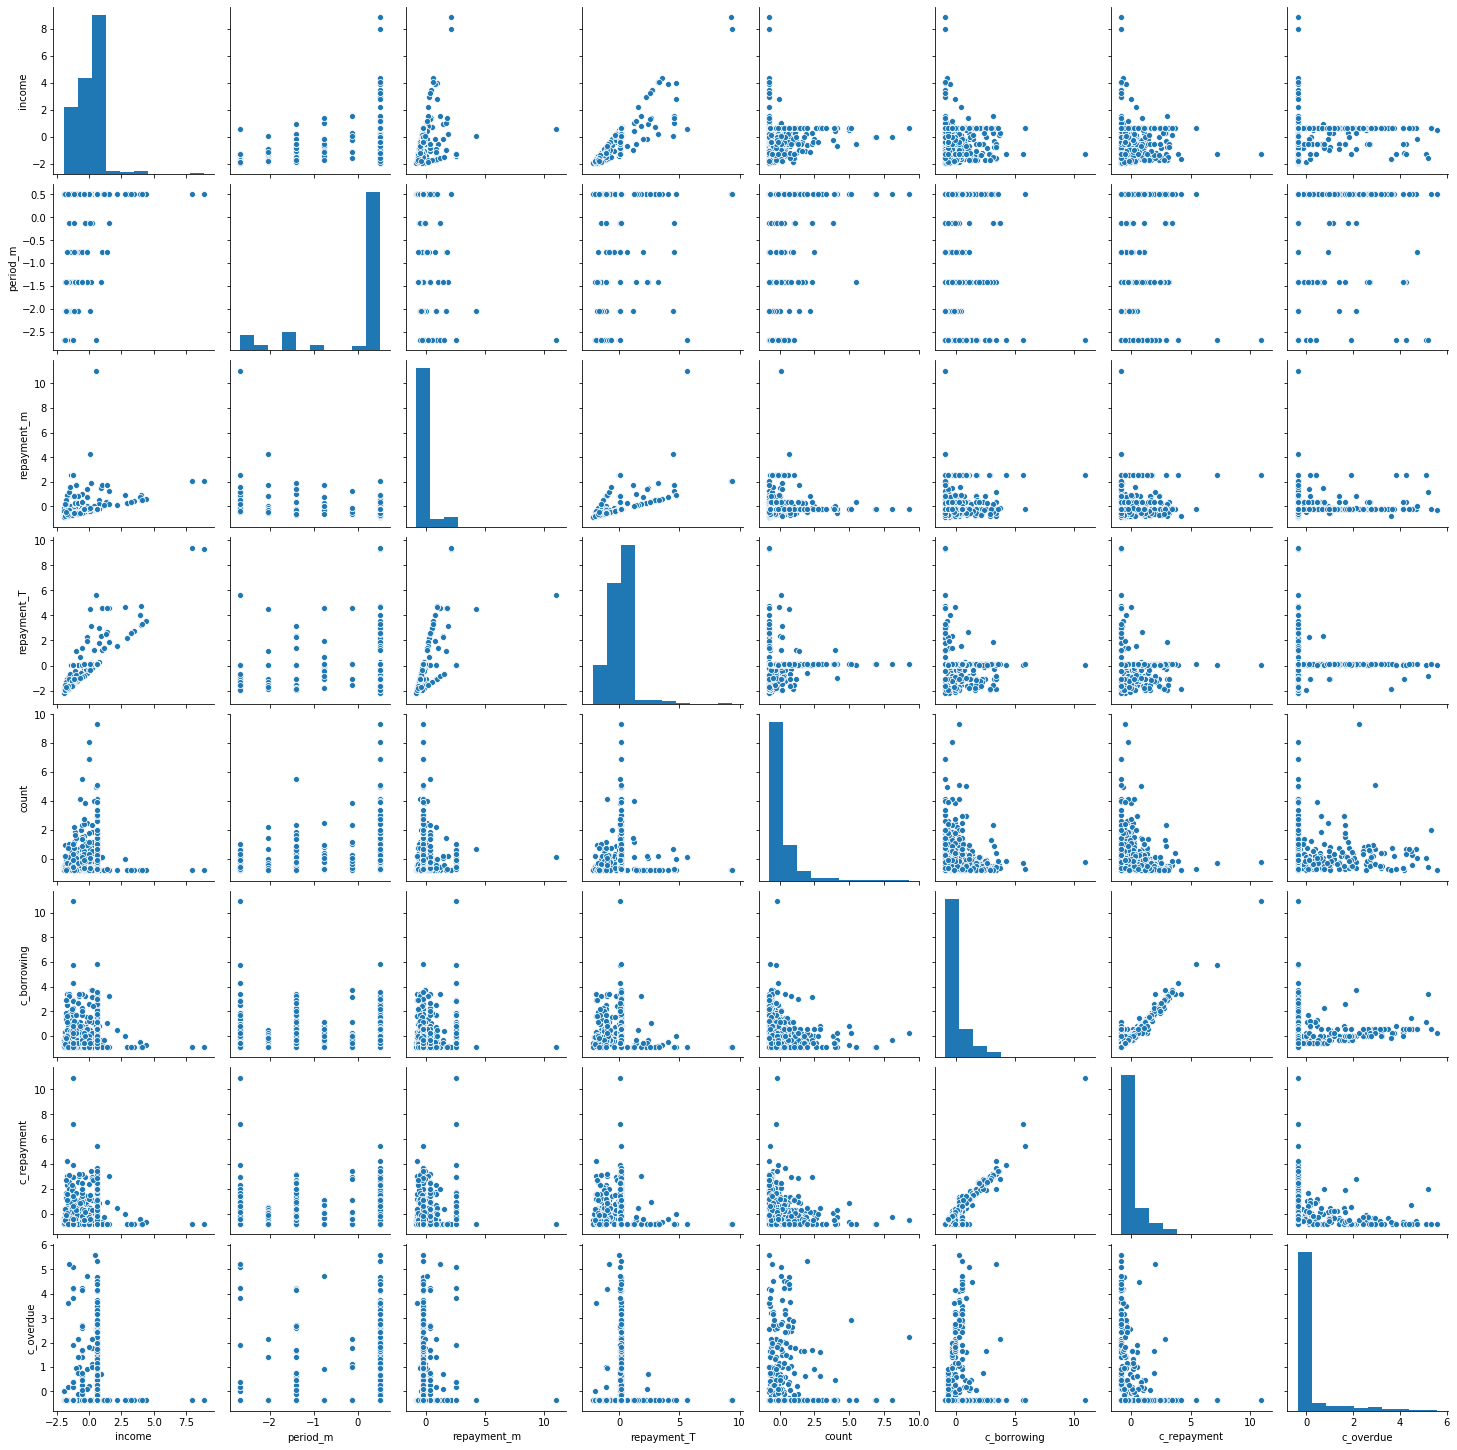

In [50]:
# 相关性对比矩阵散点图
sns.pairplot(train.iloc[:,:6:14])

In [51]:
Xtrain.columns

Index(['sex', 'degree', 'uni_level', 'u_loan', 'guarantee', 'amount', 'income',
       'period_m', 'repayment_m', 'repayment_T', 'count', 'c_borrowing',
       'c_repayment', 'c_overdue', 'c_fre', 'c_over_fre', 'c_overrate',
       'c_over_frerate'],
      dtype='object')

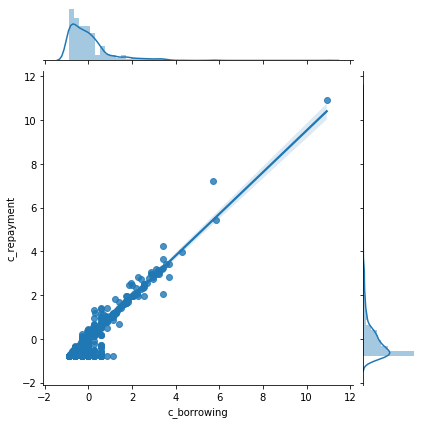

In [56]:
sns.jointplot(x='c_borrowing',y='c_repayment',data=train,kind='reg')

## 数据转换

In [59]:
# 计算训练集正负样本的数量
n_positive = train.target.sum()  # 正样本
n_negative = len(train)-n_positive  # 负样本

In [61]:
n_positive,n_negative

(577, 186)

In [63]:
train.columns

Index(['sex', 'degree', 'uni_level', 'u_loan', 'guarantee', 'amount', 'income',
       'period_m', 'repayment_m', 'repayment_T', 'count', 'c_borrowing',
       'c_repayment', 'c_overdue', 'c_fre', 'c_over_fre', 'c_overrate',
       'c_over_frerate', 'target'],
      dtype='object')

- df：计算woe的数据，必须包含target，且取值为0，1
- var：计算woe的变量的名字
- global_bt：全局变量bad total 正样本的数量,n_positve
- global_gt：全局变量good total 负样本的数量，n_negative
- min_sample：指定每个箱子中的最小样本量，一般设为样本总量的5%
- alpha：默认0.01，如果划分后的iv>划分前的iv*(1+alpha)，则计算划分 （重分箱）

In [66]:
# 初始化列表
data_woe_train = train
data_woe_test = test
civ_list = []
# 循环遍历每一列
      # 判断数据类型分别做分箱
      # 将分箱结果传入初始化的列表
      # 得到woe和iv后，对原数据进行woe转换
for col in list(train.columns[:-1]):
    if train[col].dtypes == 'object':
        civ = fp.proc_woe_discrete(train,col,n_positive,n_negative,0.2*len(train),alpha=0.05)
    else:
        civ = fp.proc_woe_continuous(train,col,n_positive,n_negative,0.2*len(train),alpha=0.05)
    civ_list.append(civ)
    # 对原数据做转换
    data_woe_train[col] = fp.woe_trans(train[col],civ)
    data_woe_test[col] = fp.woe_trans(test[col],civ)
    
# 输出包含分箱结果的DataFrame
civ_df = eval.eval_feature_detail(civ_list,'output_feature.csv')  # 只包含训练集的分箱结果

---------------process discrete variable:sex----------------
--------------process discrete variable:degree--------------
------------process discrete variable:uni_level-------------
--------------process discrete variable:u_loan--------------
------------process discrete variable:guarantee-------------
-------------process continuous variable:amount-------------


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/woe/feature_process.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = cpvar


-------------process continuous variable:income-------------
------------process continuous variable:period_m------------
----------process continuous variable:repayment_m-----------
----------process continuous variable:repayment_T-----------
-------------process continuous variable:count--------------
----------process continuous variable:c_borrowing-----------
----------process continuous variable:c_repayment-----------
-----------process continuous variable:c_overdue------------
-------------process continuous variable:c_fre--------------
-----------process continuous variable:c_over_fre-----------
-----------process continuous variable:c_overrate-----------
---------process continuous variable:c_over_frerate---------
sex
degree
uni_level
u_loan
guarantee
amount
income
period_m
repayment_m
repayment_T
count
c_borrowing
c_repayment
c_overdue
c_fre
c_over_fre
c_overrate
c_over_frerate


In [68]:
lenddata.amount.value_counts()

 0.109063    836
-1.048239     52
-1.511160     17
-1.742621     13
-1.279700     11
            ... 
-1.464868      1
-0.400150      1
 9.213978      1
-1.690241      1
 3.607565      1
Name: amount, Length: 120, dtype: int64

## 通过iv值筛选变量

In [71]:
iv_thred = 0.03
iv = civ_df[['var_name','iv']].drop_duplicates()
iv

,var_name,iv
0,sex,1.259245e-02
0,degree,3.579293e-01
0,uni_level,6.533793e-02
0,u_loan,9.820767e-02
0,guarantee,4.194533e-01
0,amount,1.327321e-13
0,income,7.220055e-01
0,period_m,1.327321e-13
0,repayment_m,9.547669e-01
0,repayment_T,4.910728e-01


In [90]:
x_col  = iv.var_name[iv.iv>iv_thred]
x_col

0            degree
0         uni_level
0            u_loan
0         guarantee
0            income
0       repayment_m
0       repayment_T
0             count
0       c_borrowing
0       c_repayment
0         c_overdue
0             c_fre
0        c_over_fre
0        c_overrate
0    c_over_frerate
Name: var_name, dtype: object

In [91]:
x_col = pd.DataFrame(x_col).reset_index(drop=True)
x_col = x_col.drop(8,axis=0)
x_col

,var_name
0,degree
1,uni_level
2,u_loan
3,guarantee
4,income
5,repayment_m
6,repayment_T
7,count
9,c_repayment
10,c_overdue


In [97]:
cols = x_col.var_name
cols

0             degree
1          uni_level
2             u_loan
3          guarantee
4             income
5        repayment_m
6        repayment_T
7              count
9        c_repayment
10         c_overdue
11             c_fre
12        c_over_fre
13        c_overrate
14    c_over_frerate
Name: var_name, dtype: object

In [101]:
# 再把x和y分开
Xtrain = data_woe_train[list(cols)]
Ytrain = data_woe_train['target']
Xtest = data_woe_test[list(cols)]
Ytest  = data_woe_test['target']

In [102]:
Xtrain

,degree,uni_level,u_loan,guarantee,income,repayment_m,repayment_T,count,c_repayment,c_overdue,c_fre,c_over_fre,c_overrate,c_over_frerate
0,0.272547,-0.078022,-0.164894,-0.210296,0.466470,-0.002948,1.095522,0.153914,-0.941041,1.602620,-0.138845,1.602620,1.602620,1.602620
1,0.272547,0.841977,-0.164894,-0.210296,-0.589609,-0.654657,-0.571467,-0.504701,-0.941041,1.602620,-0.743438,1.602620,1.602620,1.602620
2,0.272547,-0.078022,-0.164894,-0.210296,2.073341,2.100015,1.095522,0.153914,1.002066,1.602620,-0.138845,1.602620,1.602620,1.602620
3,0.272547,-0.078022,-0.164894,2.062468,2.073341,-0.002948,1.095522,0.153914,0.659660,1.602620,1.102866,1.602620,1.602620,1.602620
4,0.272547,-0.078022,-0.164894,-0.210296,0.466470,-0.002948,0.665815,0.153914,-0.941041,1.602620,-0.743438,1.602620,1.602620,1.602620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,0.272547,-0.078022,-0.164894,-0.210296,2.073341,2.100015,0.665815,0.153914,0.371979,1.602620,-0.138845,1.602620,1.602620,1.602620
759,0.272547,-0.078022,-0.164894,-0.210296,-0.589609,-0.654657,-0.571467,0.153914,1.002066,1.602620,-0.138845,1.602620,1.602620,1.602620
760,0.272547,-0.078022,-0.164894,-0.210296,0.466470,-0.002948,1.095522,0.153914,0.371979,1.602620,-0.138845,1.602620,1.602620,1.602620
761,0.272547,-0.078022,-0.164894,-0.210296,-0.589609,-0.654657,-0.571467,-0.504701,-0.941041,-4.190118,-0.743438,-4.190118,-4.190118,-4.190118


# 建模

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
LR  = LogisticRegression(C=0.1)
LR.fit(Xtrain,Ytrain)
LR.score(Xtest,Ytest)

0.926829268292683

In [105]:
LR.coef_

array([[ 0.32930131,  0.08706048, -0.06420536,  0.43509911,  0.34945745,
         0.36098453,  0.13768524,  0.2164543 ,  0.69872865,  0.23365345,
         0.18027637,  0.23365345,  0.23365345,  0.23365345]])

In [108]:
import statsmodels.api as sm

In [111]:
Xtrain_1 = sm.add_constant(Xtrain)
Xtest_1 = sm.add_constant(Xtest)

In [158]:
Xtrain_1.columns

Index(['const', 'degree', 'uni_level', 'u_loan', 'guarantee', 'income',
       'repayment_m', 'repayment_T', 'count', 'c_repayment', 'c_overdue',
       'c_fre', 'c_over_fre', 'c_overrate', 'c_over_frerate'],
      dtype='object')

In [291]:
Xtrain_1

,const,degree,uni_level,u_loan,guarantee,income,repayment_m,repayment_T,count,c_repayment,c_overdue,c_fre,c_over_fre,c_overrate,c_over_frerate
0,1.0,0.272547,-0.078022,-0.164894,-0.210296,0.466470,-0.002948,1.095522,0.153914,-0.941041,1.602620,-0.138845,1.602620,1.602620,1.602620
1,1.0,0.272547,0.841977,-0.164894,-0.210296,-0.589609,-0.654657,-0.571467,-0.504701,-0.941041,1.602620,-0.743438,1.602620,1.602620,1.602620
2,1.0,0.272547,-0.078022,-0.164894,-0.210296,2.073341,2.100015,1.095522,0.153914,1.002066,1.602620,-0.138845,1.602620,1.602620,1.602620
3,1.0,0.272547,-0.078022,-0.164894,2.062468,2.073341,-0.002948,1.095522,0.153914,0.659660,1.602620,1.102866,1.602620,1.602620,1.602620
4,1.0,0.272547,-0.078022,-0.164894,-0.210296,0.466470,-0.002948,0.665815,0.153914,-0.941041,1.602620,-0.743438,1.602620,1.602620,1.602620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,1.0,0.272547,-0.078022,-0.164894,-0.210296,2.073341,2.100015,0.665815,0.153914,0.371979,1.602620,-0.138845,1.602620,1.602620,1.602620
759,1.0,0.272547,-0.078022,-0.164894,-0.210296,-0.589609,-0.654657,-0.571467,0.153914,1.002066,1.602620,-0.138845,1.602620,1.602620,1.602620
760,1.0,0.272547,-0.078022,-0.164894,-0.210296,0.466470,-0.002948,1.095522,0.153914,0.371979,1.602620,-0.138845,1.602620,1.602620,1.602620
761,1.0,0.272547,-0.078022,-0.164894,-0.210296,-0.589609,-0.654657,-0.571467,-0.504701,-0.941041,-4.190118,-0.743438,-4.190118,-4.190118,-4.190118


In [160]:
Xtrain_2 = Xtrain_1.drop(['c_over_fre','c_overrate','c_over_frerate'],axis=1)
Xtrain_2.head()

,const,degree,uni_level,u_loan,guarantee,income,repayment_m,repayment_T,count,c_repayment,c_overdue,c_fre
0,1.0,0.272547,-0.078022,-0.164894,-0.210296,0.466470,-0.002948,1.095522,0.153914,-0.941041,1.60262,-0.138845
1,1.0,0.272547,0.841977,-0.164894,-0.210296,-0.589609,-0.654657,-0.571467,-0.504701,-0.941041,1.60262,-0.743438
2,1.0,0.272547,-0.078022,-0.164894,-0.210296,2.073341,2.100015,1.095522,0.153914,1.002066,1.60262,-0.138845
3,1.0,0.272547,-0.078022,-0.164894,2.062468,2.073341,-0.002948,1.095522,0.153914,0.659660,1.60262,1.102866
4,1.0,0.272547,-0.078022,-0.164894,-0.210296,0.466470,-0.002948,0.665815,0.153914,-0.941041,1.60262,-0.743438


In [280]:
model = sm.Logit(Ytrain,Xtrain_2,family = sm.families.Binomial()).fit()

Optimization terminated successfully.
         Current function value: 0.165891
         Iterations 9


In [162]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  763
Model:                          Logit   Df Residuals:                      751
Method:                           MLE   Df Model:                           11
Date:                Sun, 21 Jun 2020   Pseudo R-squ.:                  0.7013
Time:                        12:18:53   Log-Likelihood:                -126.57
converged:                       True   LL-Null:                       -423.76
Covariance Type:            nonrobust   LLR p-value:                2.232e-120
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1994      0.194      6.183      0.000       0.819       1.580
degree          0.8997      0.399      2.254      0.024       0.117       1.682
uni_level       0.6992      0.863      0.810      0.418      -0.992       2.391
u_loan         -0.6962      0.581     -1.199      0.231      -1.834       0.442
guarantee       0.9181      0.294      3.118      0.002       0.341       1.495
income          0.6128      0.418      1.467      0.142      -0.206       1.432
repayment_m     0.5120      0.371      1.380      0.168      -0.215       1.239
repayment_T    -0.1320      0.459     -0.288      0.773      -1.031       0.767
count           0.9367      0.595      1.574      0.115      -0.230       2.103
c_repayment     1.5398      0.404      3.809      0.000       0.748       2.332
c_overdue       1.0248      0.091     11.284      0.000       0.847       1.203
c_fre          -0.5536      0.435     -1.274      0.203      -1.405       0.298
===============================================================================
"""

In [166]:
Xtrain_3 = Xtrain_2[['degree','guarantee','c_repayment','c_overdue']]

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(Xtrain_2.iloc[:,1:].values,i
                                 ) for i in range(Xtrain_2.shape[1]-1)]
print(pd.Series(dict(zip(Xtrain_2.columns[1:],vif))))

degree         1.244035
uni_level      1.190912
u_loan         1.199335
guarantee      1.233656
income         3.264299
repayment_m    4.109059
repayment_T    2.970385
count          1.079604
c_repayment    2.537797
c_overdue      1.246525
c_fre          2.508727
dtype: float64


In [193]:
Xtest_3 = Xtest[['degree','guarantee','c_repayment','c_overdue']]

In [292]:
LR = LogisticRegression(C=0.1).fit(Xtrain_2,Ytrain)
LR.score(Xtest_2,Ytest)

0.926829268292683

In [282]:
Xtest_2 = Xtest_1.drop(['c_over_fre','c_overrate','c_over_frerate'],axis=1)
Xtest_2.head()

,const,degree,uni_level,u_loan,guarantee,income,repayment_m,repayment_T,count,c_repayment,c_overdue,c_fre
0,1.0,0.272547,-0.078022,-0.164894,-0.210296,0.466470,2.100015,1.095522,0.153914,0.659660,1.60262,1.102866
1,1.0,0.272547,-0.078022,-0.164894,2.062468,0.466470,-0.002948,0.665815,0.153914,-0.941041,1.60262,-0.743438
2,1.0,0.272547,0.841977,-0.164894,-0.210296,-0.589609,-0.654657,-0.571467,0.153914,-0.941041,1.60262,-0.743438
3,1.0,-0.644618,-0.078022,0.600472,2.062468,-0.589609,-0.002948,-0.571467,0.153914,-0.941041,1.60262,-0.743438
4,1.0,-0.644618,-0.078022,0.600472,2.062468,0.466470,2.100015,1.095522,0.153914,-0.941041,1.60262,-0.743438


In [177]:
cols = ['degree','guarantee','c_repayment','c_overdue']

# 分值计算

In [285]:
import math
score=500
pdo=50
factor = pdo / math.log(2)
offset = score - factor * math.log(1/50)
factor,offset

(72.13475204444818, 782.1928094887362)

In [286]:
civ_df['var_name'].values

array(['sex', 'sex', 'degree', 'degree', 'degree', 'uni_level',
       'uni_level', 'u_loan', 'u_loan', 'guarantee', 'guarantee',
       'amount', 'income', 'income', 'income', 'period_m', 'repayment_m',
       'repayment_m', 'repayment_m', 'repayment_T', 'repayment_T',
       'repayment_T', 'count', 'count', 'c_borrowing', 'c_borrowing',
       'c_borrowing', 'c_borrowing', 'c_repayment', 'c_repayment',
       'c_repayment', 'c_repayment', 'c_overdue', 'c_overdue', 'c_fre',
       'c_fre', 'c_fre', 'c_over_fre', 'c_over_fre', 'c_overrate',
       'c_overrate', 'c_over_frerate', 'c_over_frerate'], dtype=object)

In [287]:
# 提取进入模型中的列名
p_list = []
for var_values in civ_df['var_name'].values:
    if var_values in list(cols):  # 布尔值
        p_list.append(True)
    else:
        p_list.append(False)
print(p_list)

[False, False, True, True, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False]


In [288]:
score_civ_df  = civ_df.iloc[p_list,:]
score_civ_df.head()

,var_name,split_list,sub_total_sample_num,positive_sample_num,negative_sample_num,sub_total_num_percentage,positive_rate_in_sub_total,woe_list,iv_list,iv
0,degree,[college ],205,127,78,0.268676,0.619512,-0.644618,0.128441,0.357929
1,degree,"[bachelor, master]",548,440,108,0.718218,0.802920,0.272547,0.049582,0.357929
2,degree,[doctor],10,10,0,0.013106,1.000000,10.380840,0.179907,0.357929
0,guarantee,[Y],636,455,181,0.833552,0.715409,-0.210296,0.038812,0.419453
1,guarantee,[N],127,122,5,0.166448,0.960630,2.062468,0.380642,0.419453


In [290]:
# 提取出对应变量的系数
coef_df = pd.DataFrame(LR.coef_).T
coef_df.index = list(Xtest_2.columns)
coef_df.columns=['coef']
coef_df

,coef
const,0.000051
degree,0.333745
uni_level,0.088616
u_loan,-0.066364
guarantee,0.438593
income,0.344626
repayment_m,0.357480
repayment_T,0.128009
count,0.211840
c_repayment,0.689052


In [183]:
# 系数匹配箱子的个数
coef_score = []
for i in score_civ_df['var_name']:
    temp = float(coef_df[coef_df.index==i].coef)
    coef_score.append(temp)

In [184]:
len(coef_score)

11

In [185]:
len(score_civ_df)

11

## 对应元素相乘计算每个箱子的分数

In [187]:
score_civ_df[['var_name','split_list']]

,var_name,split_list
0,degree,[college ]
1,degree,"[bachelor, master]"
2,degree,[doctor]
0,guarantee,[Y]
1,guarantee,[N]
0,c_repayment,"(-INF,-0.51343623416]"
1,c_repayment,"(-0.51343623416,-0.23336788]"
2,c_repayment,"(-0.23336788,0.37261357100000014]"
3,c_repayment,"(0.37261357100000014,+INF)"
0,c_overdue,"(-INF,-0.37018922]"


In [224]:
n=11
score = offset/n + factor * (LR.intercept_/n + np.multiply(coef_score,score_civ_df['woe_list']))
scorecard=score_civ_df[['var_name','split_list']]
scorecard['score'] = pd.DataFrame(score)
scorecard['score'] = scorecard.score.astype(int)
scorecard

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,var_name,split_list,score
0,degree,[college ],58
1,degree,"[bachelor, master]",86
2,degree,[doctor],387
0,guarantee,[Y],69
1,guarantee,[N],159
0,c_repayment,"(-INF,-0.51343623416]",20
1,c_repayment,"(-0.51343623416,-0.23336788]",100
2,c_repayment,"(-0.23336788,0.37261357100000014]",139
3,c_repayment,"(0.37261357100000014,+INF)",118
0,c_overdue,"(-INF,-0.37018922]",183


# 通过评分来预测标签

In [295]:
p = LR.predict_proba(Xtest_2)[:,-1]  # 筛选出标签为1的概率
odds = p/(1-p)
cus_score = [int(offset+factor*math.log(i)) for i in odds]

In [296]:
cus_score

[1092,
 1002,
 882,
 939,
 1035,
 533,
 1104,
 980,
 563,
 538,
 945,
 862,
 985,
 996,
 927,
 1038,
 1098,
 850,
 1337,
 975,
 996,
 970,
 1047,
 490,
 1141,
 866,
 1151,
 1132,
 1009,
 979,
 1078,
 551,
 975,
 1195,
 878,
 1058,
 854,
 957,
 579,
 1129,
 949,
 1039,
 1093,
 862,
 1098,
 850,
 939,
 1029,
 1110,
 975,
 870,
 961,
 949,
 969,
 939,
 979,
 1086,
 963,
 1145,
 1029,
 949,
 992,
 954,
 876,
 478,
 980,
 1141,
 545,
 1146,
 1089,
 979,
 876,
 583,
 1035,
 468,
 508,
 657,
 1025,
 1025,
 917,
 1098,
 486,
 468,
 1109,
 1057,
 1079,
 927,
 931,
 876,
 980,
 1145,
 986,
 996,
 996,
 939,
 924,
 570,
 957,
 1145,
 1145,
 1204,
 854,
 1002,
 606,
 621,
 1025,
 1165,
 996,
 949,
 924,
 1002,
 551,
 992,
 949,
 1145,
 958,
 980,
 876,
 876,
 1025,
 495,
 1088,
 612,
 985,
 1094,
 545,
 979,
 1025,
 924,
 872,
 876,
 943,
 501,
 490,
 872,
 986,
 1038,
 996,
 854,
 1139,
 970,
 468,
 561,
 876,
 934,
 1155,
 953,
 939,
 1092,
 1106,
 965,
 939,
 1062,
 1007,
 876,
 1098,
 957,
 11

In [271]:
# 排序
score_df = pd.DataFrame([cus_score,list(Ytest)]).T
score_df.columns=['score','target']
score_df = score_df.sort_values(by='score',ascending=False)
score_df

,score,target
253,1306,1
18,1306,1
264,1306,1
201,1306,1
205,1289,1
...,...,...
141,499,0
298,499,0
74,499,0
230,499,0


# KS

In [297]:
# 对测试集的分数进行分箱查看其分布
bins  = pd.qcut(score_df['score'],10)
bins = pd.DataFrame(bins.tolist())
bins.index = score_df.index
score_df['bin'] = bins
score_df.head()

,score,target,bin
253,1306,1,"(1077.0, 1306.0]"
18,1306,1,"(1077.0, 1306.0]"
264,1306,1,"(1077.0, 1306.0]"
201,1306,1,"(1077.0, 1306.0]"
205,1289,1,"(1077.0, 1306.0]"


In [273]:
# 统计不同样本类别占当前箱子的比例
gp_t = score_df.groupby(by=['bin'])
gp_1 = score_df[score_df['target']==1].groupby(by=['bin'])
gp_1.size()

bin
(563.1, 880.0]       9
(880.0, 907.0]      37
(907.0, 969.0]      13
(969.0, 987.0]      49
(987.0, 997.0]      10
(997.0, 1005.0]     46
(1005.0, 1026.0]    43
(1026.0, 1077.0]     9
(1077.0, 1306.0]    30
dtype: int64

In [274]:
gp_t.size()

bin
(498.999, 563.1]    33
(563.1, 880.0]      42
(880.0, 907.0]      45
(907.0, 969.0]      14
(969.0, 987.0]      52
(987.0, 997.0]      12
(997.0, 1005.0]     47
(1005.0, 1026.0]    44
(1026.0, 1077.0]     9
(1077.0, 1306.0]    30
dtype: int64

In [298]:
KS_df = pd.DataFrame(gp_t.size(),columns=['count_t']) 
KS1_df = pd.DataFrame(gp_1.size(),columns=['count_1']) 
KS_df['count_1'] = KS1_df ['count_1']  # 每个箱子类别为1的样本个数
KS_df.count_1.fillna(0,inplace=True)
KS_df['count_0'] = KS_df['count_t']-KS_df['count_1']    # 每个箱子类别为0的样本个数
KS_df['Cum_count_1'] = KS_df['count_1'].cumsum()/KS_df['count_1'].sum()
KS_df['Cum_count_0'] = KS_df['count_0'].cumsum()/KS_df['count_0'].sum()
KS_df['Cum_count_t'] = KS_df['count_t'].cumsum()/KS_df['count_t'].sum()

In [299]:
KS_df

,count_t,count_1,count_0,Cum_count_1,Cum_count_0,Cum_count_t
bin,,,,,,
"(498.999, 563.1]",33,0.0,33.0,0.000000,0.402439,0.100610
"(563.1, 880.0]",42,9.0,33.0,0.036585,0.804878,0.228659
"(880.0, 907.0]",45,37.0,8.0,0.186992,0.902439,0.365854
"(907.0, 969.0]",14,13.0,1.0,0.239837,0.914634,0.408537
"(969.0, 987.0]",52,49.0,3.0,0.439024,0.951220,0.567073
"(987.0, 997.0]",12,10.0,2.0,0.479675,0.975610,0.603659
"(997.0, 1005.0]",47,46.0,1.0,0.666667,0.987805,0.746951
"(1005.0, 1026.0]",44,43.0,1.0,0.841463,1.000000,0.881098
"(1026.0, 1077.0]",9,9.0,0.0,0.878049,1.000000,0.908537


In [300]:
# 设置原点的出发点
zero = pd.DataFrame([0,0,0]).T
zero.columns = ['Cum_count_1','Cum_count_0','Cum_count_t']
KS_plot_df = KS_df[['Cum_count_1','Cum_count_0','Cum_count_t']]
KS_plot_df = zero.append(KS_plot_df,ignore_index=True)
KS_plot_df

,Cum_count_1,Cum_count_0,Cum_count_t
0,0.000000,0.000000,0.000000
1,0.000000,0.402439,0.100610
2,0.036585,0.804878,0.228659
3,0.186992,0.902439,0.365854
4,0.239837,0.914634,0.408537
5,0.439024,0.951220,0.567073
6,0.479675,0.975610,0.603659
7,0.666667,0.987805,0.746951
8,0.841463,1.000000,0.881098
9,0.878049,1.000000,0.908537


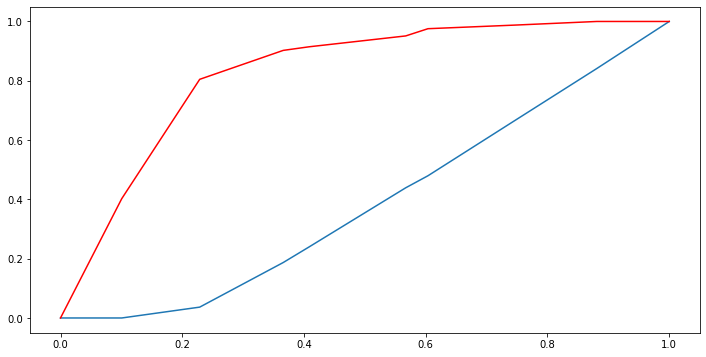

In [301]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(KS_plot_df['Cum_count_t'],KS_plot_df['Cum_count_1'])
plt.plot(KS_plot_df['Cum_count_t'],KS_plot_df['Cum_count_0'],color='r')

In [302]:
np.max(KS_df.Cum_count_0-KS_df.Cum_count_1)  # 区分度

0.7682926829268293

In [98]:
KS_df.Cum_count_0-KS_df.Cum_count_1

bin
(435.999, 512.1]    0.402439
(512.1, 842.0]      0.743902
(842.0, 905.0]      0.719512
(905.0, 937.0]      0.650407
(937.0, 967.0]      0.536585
(967.0, 984.0]      0.443089
(984.0, 1022.0]     0.373984
(1022.0, 1078.6]    0.252033
(1078.6, 1117.0]    0.130081
(1117.0, 1351.0]    0.000000
dtype: float64